# Prequisites

In [1]:
import cv2 
import os 
import numpy as np 
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from imutils import perspective

# Detector Training

## Preparing annotations

In [ ]:
# Preparing Testing/Validation Annotation Text file
sroie_test_pred_box_dir = '/content/drive/MyDrive/SROIE/test/box'
sroie_root_dir = '/content/drive/MyDrive/SROIE/test'

# Make coord files GT
from tqdm.notebook import tqdm
import os
import json
step = 'test'
step_folder = sroie_test_pred_box_dir
for file_name in tqdm(os.listdir(step_folder)):
  try:
    var = open(f'{step_folder}/{file_name}', "r")
    var = var.readlines()
    img_path_text = f'{step}/{file_name[:-4]}.jpg'
    lis = []
    for box in var:
        row = box.split(',')
        c = [int(x) for x in row[:8]]
        text = ','.join(row[8:])
        text = text.replace("\n", '')
        coords = [[c[0], c[1]], [c[2], c[3]], [c[4], c[5]], [c[6], c[7]]]
        dic = {}
        dic["points"] = coords
        dic["transcription"] = text
        lis.append(dic)
    lis = json.dumps(lis)
    with open(f"{sroie_root_dir}/{step}.txt", "a") as ob:
        ob.write(img_path_text + "\t" + str(lis) + "\n")
  except:
    print(f"Error while parsing {file_name}")
print('Done')

  0%|          | 0/347 [00:00<?, ?it/s]

Error while parsing X51006619503.txt
Error while parsing X51006328967.txt
Done


In [ ]:
sroie_train_pred_box_dir = '/content/drive/MyDrive/SROIE/train/box'
sroie_root_dir = '/content/drive/MyDrive/SROIE/train'

# Make coord files GT
from tqdm.notebook import tqdm
import os
import json
step = 'train'
step_folder = sroie_train_pred_box_dir
for file_name in tqdm(os.listdir(step_folder)):
  try:
    var = open(f'{step_folder}/{file_name}', "r")
    var = var.readlines()
    img_path_text = f'{step}/{file_name[:-4]}.jpg'
    lis = []
    for box in var:
        row = box.split(',')
        c = [int(x) for x in row[:8]]
        text = ','.join(row[8:])
        text = text.replace("\n", '')
        coords = [[c[0], c[1]], [c[2], c[3]], [c[4], c[5]], [c[6], c[7]]]
        dic = {}
        dic["points"] = coords
        dic["transcription"] = text
        lis.append(dic)
    lis = json.dumps(lis)
    with open(f"{sroie_root_dir}/{step}.txt", "a") as ob:
        ob.write(img_path_text + "\t" + str(lis) + "\n")
  except:
    print(f"Error while parsing {file_name}")
print('Done')

  0%|          | 0/626 [00:00<?, ?it/s]

Done


## Clone PaddleOCR, download pre-trained model

In [2]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 45337, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 45337 (delta 70), reused 105 (delta 41), pack-reused 45193
Receiving objects: 100% (45337/45337), 338.44 MiB | 8.84 MiB/s, done.
Resolving deltas: 100% (31961/31961), done.


In [3]:
%cd ~
%cd ../
!pwd
%cd content
!pwd
%cd PaddleOCR

/root
/
/
/content
/content
/content/PaddleOCR


In [ ]:
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/pretrained/MobileNetV3_large_x0_5_pretrained.pdparams
#!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/pretrained/ResNet50_vd_ssld_pretrained.pdparams
#!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/pretrained/ResNet18_vd_pretrained.pdparams

--2023-01-23 01:35:41--  https://paddleocr.bj.bcebos.com/pretrained/MobileNetV3_large_x0_5_pretrained.pdparams
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3189601 (3.0M) [application/octet-stream]
Saving to: ‘./pretrain_models/MobileNetV3_large_x0_5_pretrained.pdparams’

MobileNetV3_large_x 100%[===================>]   3.04M   971KB/s    in 3.2s    

2023-01-23 01:35:45 (971 KB/s) - ‘./pretrain_models/MobileNetV3_large_x0_5_pretrained.pdparams’ saved [3189601/3189601]



In [4]:
!python -m pip install paddlepaddle-gpu==2.1.3.post112 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!python -c "import paddle; print(paddle.__version__)"

#import paddleocr
!nvidia-smi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.8/349.8 MB 3.2 MB/s eta 0:00:00
2.1.3
Mon Jan 23 09:39:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    28W /  70W |      0MiB / 15109MiB |      

In [6]:
! rm -r '/content/drive'
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Multi-GPU Training
#!python3 -m paddle.distributed.launch --gpus '0,1'  tools/train.py -c configs/det/det_mv3_db.yml -o Global.pretrained_model=./pretrain_models/MobileNetV3_large_x0_5_pretrained

In [ ]:
!pip install -r requirements.txt

## Unpack data from Google Drive

In [ ]:
#copy labels from google drive to /content/PaddleOCR/train_data/sroie/text_localization
!mkdir -p '/content/PaddleOCR/train_data/sroie/text_localization'
!cp '/content/drive/MyDrive/PaddleOCR/labels/test_sroie_label.txt' '/content/PaddleOCR/train_data/sroie/text_localization/test_sroie_label.txt'
!cp '/content/drive/MyDrive/PaddleOCR/labels/train_sroie_label.txt' '/content/PaddleOCR/train_data/sroie/text_localization/train_sroie_label.txt'

#copy config from google drive to /content/PaddleOCR/configs
!cp '/content/drive/MyDrive/PaddleOCR/configs/det_r50_vd_db.yml' '/content/PaddleOCR/configs/det/det_r50_vd_db.yml'
!cp '/content/drive/MyDrive/PaddleOCR/configs/det_mv3_db.yml' '/content/PaddleOCR/configs/det/det_mv3_db.yml'
!cp '/content/drive/MyDrive/PaddleOCR/configs/det_r18_vd_ct.yml' '/content/PaddleOCR/configs/det/det_r18_vd_ct.yml'


# Unpack arcihves with train and test images
%cd '/content/PaddleOCR/train_data/sroie/text_localization'

ARCHIVE_TRAIN = os.path.join('/content/drive/MyDrive/PaddleOCR/train_data', 'train.tar.gz')
TRAIN_DATA_FOLDER = os.path.join('/content/PaddleOCR/train_data/sroie/text_localization', 'train')

ARCHIVE_TEST = os.path.join('/content/drive/MyDrive/PaddleOCR/train_data', 'test.tar.gz')
TEST_DATA_FOLDER = os.path.join('/content/PaddleOCR/train_data/sroie/text_localization', 'test')

!mkdir -p '/content/PaddleOCR/train_data/sroie/text_localization/train'
%cd '/content/PaddleOCR/train_data/sroie/text_localization/train'
if os.path.exists(ARCHIVE_TRAIN):
  !tar -zxvf {ARCHIVE_TRAIN}

!mkdir -p '/content/PaddleOCR/train_data/sroie/text_localization/test'
%cd '/content/PaddleOCR/train_data/sroie/text_localization/test'
if os.path.exists(ARCHIVE_TEST):
  !tar -zxvf {ARCHIVE_TEST}


## Train model

In [ ]:
#Single GPU Training
%cd ~/../content/PaddleOCR
!python3 tools/train.py -c configs/det/det_mv3_db.yml  \
        -o Global.pretrained_model=./pretrain_models/MobileNetV3_large_x0_5_pretrained 

#!python3 tools/train.py -c configs/det/det_r18_vd_ct.yml  \
#        -o Global.pretrained_model=./pretrain_models/ResNet18_vd_pretrained.pdparams

#!python3 tools/train.py -c configs/det/det_r50_vd_db.yml  \
#         -o Global.pretrained_model=./pretrain_models/ResNet50_vd_ssld_pretrained 

In [ ]:
# copy model files to drive
!mkdir -p '/content/drive/MyDrive/PaddleOCR/output'
!cp -r '/content/PaddleOCR/output' '/content/drive/MyDrive/PaddleOCR/output'

# Recognizer Training

## Preparing annotations

In [ ]:
# Preparing the Train Annotation File and images
#!cp -r /content/drive/MyDrive/PaddleOCR/recognizer/img/. /content/drive/MyDrive/PaddleOCR/recognizer/test/
count = 0
flag = 1
img_counter = 0
!mkdir -p '/content/drive/MyDrive/PaddleOCR/recognizer/train'

sroie_train_gt_box_dir = '/content/drive/MyDrive/SROIE/train/box'
sroie_train_gt_img_dir = '/content/drive/MyDrive/SROIE/train/img'
labels_save_dir = '/content/drive/MyDrive/PaddleOCR/labels'
cropped_images_dir = '/content/drive/MyDrive/PaddleOCR/recognizer/train'

for img_file_name in tqdm(os.listdir(sroie_train_gt_img_dir)):
  try:
    img_path = os.path.join(sroie_train_gt_img_dir, img_file_name)
    bounding_box_path = os.path.join(sroie_train_gt_box_dir, img_file_name[:-4]+".txt")
    var = open(bounding_box_path, "r")
    var = var.readlines()
    for box in var:
      try:
        row = box.split(',')
        col = [int(x) for x in row[:8]]
        text = ','.join(row[8:])
        text = text.replace("\n", '')
        x1, x2, x3, x4  = col[0], col[2], col[4], col[6]
        y1, y2, y3, y4  = col[1], col[3], col[5], col[7]
        coords = [[x1, y1], [x2, y2], [x3, y3], [x4, y4]]
        pts = np.asarray([(x1,y1), (x2,y2), (x3,y3), (x4,y4)])    
        img = cv2.imread(img_path)
        cropped_image_name = "img_"+str(img_counter)+".jpg"
        new_img_path = os.path.join(cropped_images_dir,cropped_image_name)
        warped = perspective.four_point_transform(img, pts)
        cv2.imwrite(new_img_path, warped)
        cropped_image_path = os.path.join("train/", cropped_image_name)
        with open(os.path.join(labels_save_dir,"rec_train.txt"), "a") as ob:
          ob.write(str(cropped_image_path)+"\t"+text+"\n")
        img_counter = img_counter + 1
      except:
        print(f'error while parsing {img_file_name}, box: {box}')
        flag = 0
    if(flag == 0):
      flag = 1
      continue
    count = count + 1
  except:
    print(f'error while parsing {img_file_name}')
print("Total number of Annotations created for Train are ", count)


In [ ]:
# Preparing the Test Annotation File and images
count = 0
flag = 1
img_counter = 0
!mkdir -p '/content/drive/MyDrive/PaddleOCR/recognizer/test'

sroie_test_gt_box_dir = '/content/drive/MyDrive/SROIE/test/box'
sroie_test_gt_img_dir = '/content/drive/MyDrive/SROIE/test/img'
labels_save_dir = '/content/drive/MyDrive/PaddleOCR/labels'
cropped_images_dir = '/content/drive/MyDrive/PaddleOCR/recognizer/img'

for img_file_name in tqdm(os.listdir(sroie_test_gt_img_dir)):
  try:
    img_path = os.path.join(sroie_test_gt_img_dir, img_file_name)
    bounding_box_path = os.path.join(sroie_test_gt_box_dir, img_file_name[:-4]+".txt")
    var = open(bounding_box_path, "r")
    var = var.readlines()
    for box in var:
      try:
        row = box.split(',')
        col = [int(x) for x in row[:8]]
        text = ','.join(row[8:])
        text = text.replace("\n", '')
        x1, x2, x3, x4  = col[0], col[2], col[4], col[6]
        y1, y2, y3, y4  = col[1], col[3], col[5], col[7]
        coords = [[x1, y1], [x2, y2], [x3, y3], [x4, y4]]
        pts = np.asarray([(x1,y1), (x2,y2), (x3,y3), (x4,y4)])    
        img = cv2.imread(img_path)
        cropped_image_name = "img_"+str(img_counter)+".jpg"
        new_img_path = os.path.join(cropped_images_dir,cropped_image_name)
        warped = perspective.four_point_transform(img, pts)
        cv2.imwrite(new_img_path, warped)
        cropped_image_path = os.path.join("test/", cropped_image_name)
        with open(os.path.join(labels_save_dir,"rec_test.txt"), "a") as ob:
          ob.write(str(cropped_image_path)+"\t"+text+"\n")
        img_counter = img_counter + 1
      except:
        print(f'error while parsing {img_file_name}, box: {box}')
        flag = 0
    if(flag == 0):
      flag = 1
      continue
    count = count + 1
  except:
    print(f'error while parsing {img_file_name}')
    continue
print("Total number of Annotations created for Test are ", count)

In [ ]:
#create archive and save it on google drive
%cd '/content/drive/MyDrive/PaddleOCR/recognizer/train' 
!pwd
!ls
!tar -zcvf train.tar.gz .

%cd '/content/drive/MyDrive/PaddleOCR/recognizer/test' 
!pwd
!ls
!tar -zcvf test.tar.gz .

[Errno 2] No such file or directory: '/content/drive/MyDrive/PaddleOCR/recognizer/train'
/content
/content
drive  pretrain_models	sample_data  test.tar.gz  train.tar.gz


## Unpack data from Google drive

In [ ]:
%cd PaddleOCR

In [ ]:
#uncompress rec train data
#copy labels from google drive to /content/PaddleOCR/train_data/sroie/text_localization
!mkdir -p '/content/PaddleOCR/train_data/sroie/text_detection'
!cp '/content/drive/MyDrive/PaddleOCR/labels/rec_test.txt' '/content/PaddleOCR/train_data/sroie/text_detection/test_sroie_label.txt'
!cp '/content/drive/MyDrive/PaddleOCR/labels/rec_train.txt' '/content/PaddleOCR/train_data/sroie/text_detection/train_sroie_label.txt'

#copy config from google drive to /content/PaddleOCR/configs
!cp '/content/drive/MyDrive/PaddleOCR/configs/en_PP-OCRv3_rec.yml' '/content/PaddleOCR/configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml'


# Unpack arcihves with train and test images
%cd '/content/PaddleOCR/train_data/sroie/text_detection'

ARCHIVE_TRAIN = os.path.join('/content/drive/MyDrive/PaddleOCR/train_data_rec', 'train.tar.gz')
TRAIN_DATA_FOLDER = os.path.join('/content/PaddleOCR/train_data/sroie/text_detection', 'train')

ARCHIVE_TEST = os.path.join('/content/drive/MyDrive/PaddleOCR/train_data_rec', 'test.tar.gz')
TEST_DATA_FOLDER = os.path.join('/content/PaddleOCR/train_data/sroie/text_detection', 'test')

!mkdir -p '/content/PaddleOCR/train_data/sroie/text_detection/train'
%cd '/content/PaddleOCR/train_data/sroie/text_detection/train'
if os.path.exists(ARCHIVE_TRAIN):
  !tar -zxvf {ARCHIVE_TRAIN}

!mkdir -p '/content/PaddleOCR/train_data/sroie/text_detection/test'
%cd '/content/PaddleOCR/train_data/sroie/text_detection/test'
if os.path.exists(ARCHIVE_TEST):
  !tar -zxvf {ARCHIVE_TEST}

## Download pre-trained model

In [ ]:
# Download the pre-trained model of en_PP-OCRv3
%cd /content/PaddleOCR
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_train.tar
#!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/en_number_mobile_v2.0_rec_train.tar

# Decompress model parameters
%cd pretrain_models
!tar -xf en_PP-OCRv3_rec_train.tar && rm -rf en_PP-OCRv3_rec_train.tar
%cd ..

#%cd pretrain_models
#!tar -xf en_number_mobile_v2.0_rec_train.tar && rm -rf en_number_mobile_v2.0_rec_train.tar
#%cd ..

## Train model

###en_PP-OCRv3_rec_train

In [ ]:
#multiple-gpu
%cd /content/PaddleOCR
!pwd
!python3 -m paddle.distributed.launch --gpus '0,1'  tools/train.py -c configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml -o Global.pretrained_model=en_PP-OCRv3_rec_train/best_accuracy

In [ ]:
#single-gpu
%cd /content/PaddleOCR
!pwd

!python3 tools/train.py -c configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml -o Global.pretrained_model=./pretrain_models/en_PP-OCRv3_rec_train/best_accuracy

### en_number_mobile_v2.0

In [ ]:
#multiple-gpu
%cd /content/PaddleOCR
!pwd
!python3 -m paddle.distributed.launch --gpus '0,1'  tools/train.py -c configs/rec/rec_en_number_lite_train.yml -o Global.pretrained_model=en_number_mobile_v2.0_rec_train/best_accuracy

In [ ]:
#single-gpu
!pwd
!python3  tools/train.py -c configs/rec/rec_en_number_lite_train.yml -o Global.pretrained_model=en_number_mobile_v2.0_rec_train/best_accuracy

# Export and save Inference model

In [14]:
%cd PaddleOCR

[Errno 2] No such file or directory: 'PaddleOCR'
/content/PaddleOCR


In [16]:
#Conversion of Recognizer Trained weights to Inference

!python3 tools/export_model.py -c configs/rec/PP-OCRv3/en_PP-OCRv3_rec.yml -o Global.pretrained_model=output/v3_en_mobile/latest  Global.save_inference_dir=./inference/en_PP-OCRv3_rec/

W0123 10:52:01.411456 22869 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 11.2, Runtime API Version: 11.2
W0123 10:52:01.418834 22869 device_context.cc:422] device: 0, cuDNN Version: 8.1.
[2023/01/23 10:52:03] ppocr INFO: load pretrain successful from output/v3_en_mobile/latest
[2023/01/23 10:52:05] ppocr INFO: inference model is saved to ./inference/en_PP-OCRv3_rec/inference


In [ ]:
#conversion of Detection Trained Weights to Inference

!python3 tools/export_model.py -c configs/det/det_mv3_db.yml -o Global.pretrained_model="./output/db_mv3/best_accuracy" Global.save_inference_dir="./output/det_db_inference/"

W0821 04:14:38.911141 14130 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 11.4, Runtime API Version: 11.2
W0821 04:14:38.917029 14130 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.
[2022/08/21 04:14:41] ppocr INFO: load pretrain successful from ./output/db_mv3/best_accuracy
[2022/08/21 04:14:44] ppocr INFO: inference model is saved to ./output/det_db_inference/inference


In [ ]:
!cp -r /content/PaddleOCR/train_data/sroie/text_detection/test/pretrain_models/en_PP-OCRv3_rec_train /content/PaddleOCR/output

In [ ]:
!cd /content/PaddleOCR/train_data/sroie/text_detection/test/pretrain_models/en_PP-OCRv3_rec_train

# Test Inference model

In [18]:
from paddleocr import PaddleOCR,draw_ocr
from PIL import Image

In [21]:
#Loading the detector and ocr with the previously trained weights
custom_ocr = PaddleOCR(use_angle_cls=True,
                rec_model_dir='/content/PaddleOCR/inference/en_PP-OCRv3_rec',
                det_model_dir='/content/PaddleOCR/inference/en_PP-OCRv3_det', 
                rec_char_dict_path='ppocr/utils/en_dict.txt',
                use_gpu=True,
                show_log=False)

In [22]:
ocr = PaddleOCR(use_angle_cls=True, lang="en")

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:08<00:00, 485kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:19<00:00, 524kiB/s] 


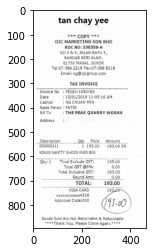

In [23]:
img_path = "/content/X00016469670.jpg"
img = cv2.imread(img_path)
plt.imshow(img)

In [24]:
result = custom_ocr.ocr(img)

In [30]:
# draw result
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
print(boxes)

#im_show = draw_ocr(image, boxes, txts, scores, font_path='doc/fonts/simfang.ttf')
#im_show = Image.fromarray(im_show)
#im_show.save('result.jpg')

[[[[191.0, 35.0], [307.0, 35.0], [307.0, 60.0], [191.0, 60.0]], ('NAY YEE', 0.9137724041938782)]]


In [40]:
!git clone https://github.com/Losyash/SROIE-datasetv2.git
     
sroie_root_dir = '/content/PaddleOCR/SROIE-datasetv2/'

sroie_test_img_dir = os.path.join(sroie_root_dir, 'test/img')
sroie_train_img_dir = os.path.join(sroie_root_dir, 'train/img')

sroie_test_pred_box_dir = os.path.join('/content/drive/MyDrive/PaddleOCR/output', 'test')
sroie_train_pred_box_dir = os.path.join('/content/drive/MyDrive/PaddleOCR/output', 'train')


def make_box_file(file_name):

    result = custom_ocr.ocr(f'{sroie_train_img_dir}/{file_name}', cls=True)
    file_name_2 = file_name.split('.')[0] + '.txt'

    with open(f'{sroie_train_pred_box_dir}/{file_name_2}', "w") as file:
        for i in range(len(result)):
            res = result[i]

            for line in res:
                data = []

                for j in range(len(line[0])):
                    coords = line[0][j]

                    data.append(str(int(coords[0])))
                    data.append(str(int(coords[1])))

                data.append(str(line[1][0]).upper())
                file.write((',').join(data) + '\n') 

for file_name in tqdm(os.listdir(sroie_train_img_dir)):
    make_box_file(file_name)



100%|██████████| 626/626 [03:57<00:00,  2.63it/s]


In [41]:
#Calculate metrics
from google.colab import drive
drive.mount('/content/drive')

!pip install Levenshtein
import argparse
import os
from Levenshtein import ratio as Levenshtein_ratio
import json
from time import localtime, strftime
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.0/174.0 KB 11.8 MB/s eta 0:00:00


In [57]:
!pwd
%cd ../
!pwd
%cd content
!python3 ./calculate_metrics_task1.py '/content/PaddleOCR/SROIE-datasetv2/test/' '/content/drive/MyDrive/PaddleOCR/output/test/'

Mean segmentation and OCR precision: 0.5397
